<a href="https://colab.research.google.com/github/Sgraham6/Sean-Graham-Projects/blob/main/Text_Mining_Class/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 Project 1

You are a data scientist working for the department of Transportation. You have built a road condition Dashboard. Your manager wanted to have more text data. Your manager let you monitor the Twitter feeds and get the latest 200 tweets regarding the weather. You are asked to perform the following tasks:

In [ ]:
from pattern.web import Twitter, hashtags
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
import en_core_web_sm

### Q1. Search Twitter using keywords "flash flood".

### Q2. Extract the last 200 tweets, including the id, hashtag, text, author, and date.

In [ ]:
%%time
engine  = Twitter(language="en")
indexid = set()
tweets  =[]
prev    = None

ID      = []
hashtag = []
text    = []
author  = []
date    = []

for tweet in engine.search("flash flood", start=prev, count= 200, cached=False):
    print(f" id = {tweet.id}, hashtag = {hashtags(tweet.text)}, text = {tweet.text}, \
          author = {tweet.author}, date = {tweet.date}")
    if len(tweet.text) > 0 and tweet.id not in indexid:
        tweets.append(tweet.text)
        indexid.add(tweet.id)

        ID.append(tweet.id)
        hashtag.append(hashtags(tweet.text))
        text.append(tweet.text)
        author.append(tweet.author)
        date.append(tweet.date)
    prev = tweet.id
print(f"Found {len(tweets)} tweets!")
print("")

 id = 1565365051070062593, hashtag = ['#PAwx'], text = RT @stormsellwx: One year ago: Hurricane Ida hits Pennsylvania. #PAwx 

- Widespread Flash Flood Warnings
- Many locations picked up more rain in 1 day than the September average
- Record flooding in southeast PA
- 5 tornadoes: 3 EF1 &amp; 2 EF2
- First tornado fatality since 2006 https://t.co/n5jFKHVAsv,           author = AsianWeather, date = Thu Sep 01 15:44:45 +0000 2022
 id = 1565365005314412545, hashtag = ['#PAwx'], text = RT @stormsellwx: One year ago: Hurricane Ida hits Pennsylvania. #PAwx 

- Widespread Flash Flood Warnings
- Many locations picked up more rain in 1 day than the September average
- Record flooding in southeast PA
- 5 tornadoes: 3 EF1 &amp; 2 EF2
- First tornado fatality since 2006 https://t.co/n5jFKHVAsv,           author = WeatherMatrix, date = Thu Sep 01 15:44:34 +0000 2022
 id = 1565364899823472640, hashtag = ['#Texas', '#Louisiana', '#Pacific', '#Javier', '#Kay'], text = RT @ScotPilie_Wx: It doesn’t tak

### Q3. Save the tweets in a data frame with columns of ID, hashtag, text, author, and date.

In [ ]:
df = pd.DataFrame((zip(ID, hashtag, text, author, date)),
    columns = ['ID', 'hashtag', 'text', 'author', 'date'])
print(df)

                     ID                                            hashtag  \
0   1565365051070062593                                            [#PAwx]   
1   1565365005314412545                                            [#PAwx]   
2   1565364899823472640      [#Texas, #Louisiana, #Pacific, #Javier, #Kay]   
3   1565364384494493698               [#IMARATCares, #FloodReliefFund2022]   
4   1565364154873303041  [#flood, #flooding, #floods, #flashflood, #Sie...   
..                  ...                                                ...   
75  1565346405786734593  [#GraanaCares, #IMARATCares, #FloodReliefFund2...   
76  1565346365760479234               [#IMARATCares, #FloodReliefFund2022]   
77  1565346261217480707                                                 []   
78  1565346114181640193                                                 []   
79  1565346112835584007                                            [#txwx]   

                                                 text          

### Q4. Create a word cloud for the text of these tweets.

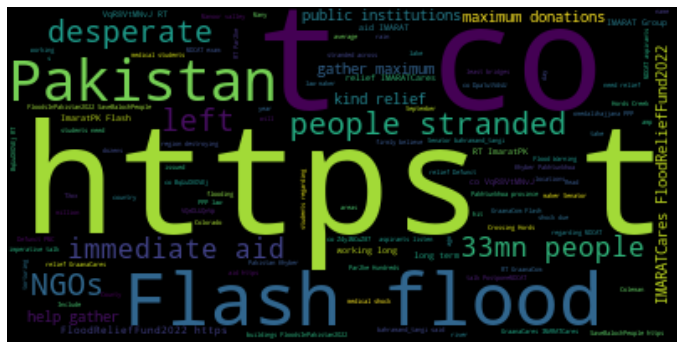

In [ ]:
%matplotlib inline

tweets = ' '.join(tweets)
wordcloud = WordCloud().generate(tweets)

plt.figure(figsize=(12, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Q5. Perform the named entity recognition.

In [ ]:
nlp = en_core_web_sm.load()

doc = nlp(tweets)

if doc.ents:
    for ent in doc.ents:
        print(f'{ent.text} : {ent.label_} - {spacy.explain(ent.label_)}')
else:
    print(f'I can not find any name entities!')

One year ago : DATE - Absolute or relative dates or periods
Hurricane Ida : EVENT - Named hurricanes, battles, wars, sports events, etc.
Pennsylvania : GPE - Countries, cities, states
PAwx 

- Widespread Flash Flood Warnings : WORK_OF_ART - Titles of books, songs, etc.
1 day : DATE - Absolute or relative dates or periods
September : DATE - Absolute or relative dates or periods
3 : CARDINAL - Numerals that do not fall under another type
EF1 &amp : ORG - Companies, agencies, institutions, etc.
2 : CARDINAL - Numerals that do not fall under another type
2006 : DATE - Absolute or relative dates or periods
One year ago : DATE - Absolute or relative dates or periods
Hurricane Ida : EVENT - Named hurricanes, battles, wars, sports events, etc.
Pennsylvania : GPE - Countries, cities, states
PAwx 

- Widespread Flash Flood Warnings : WORK_OF_ART - Titles of books, songs, etc.
1 day : DATE - Absolute or relative dates or periods
September : DATE - Absolute or relative dates or periods
3 : CARDINA